--- ABSOLUTE MOST EXPENSIVE ENTRY ---
Item: Wage (non-qualified labour, non-agricultural)
Price: 60,000.0 MMK
Location: Hakha Myoma Market, Chin
Date: 2016-06-15 00:00:00

--- MOST EXPENSIVE FOOD ITEM ---
Item: Onions (local)
Price: 45,000.0 MMK per KG
Location: Chin
Date: 2025-03-15 00:00:00

--- TOP 5 MOST EXPENSIVE FOOD ITEMS ---
            date   admin1       commodity    price unit
36284 2025-03-15     Chin  Onions (local)  45000.0   KG
30709 2023-12-15  Rakhine  Onions (local)  29333.0   KG
34373 2024-09-15  Rakhine  Onions (local)  27540.0   KG
34286 2024-09-15  Rakhine      Oil (palm)  27300.0    L
35524 2024-12-15  Rakhine      Oil (palm)  25000.0    L


C:\Users\ThetHmue\AppData\Local\Temp\ipykernel_8552\1878248703.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_avg, x='price', y='admin1', palette='YlOrRd_r')


Analysis Complete!
- Chart saved: rice_price_trend_mmk.png
- Chart saved: regional_price_comparison_mmk.png
- Data saved: myanmar_food_prices_cleaned_mmk.csv


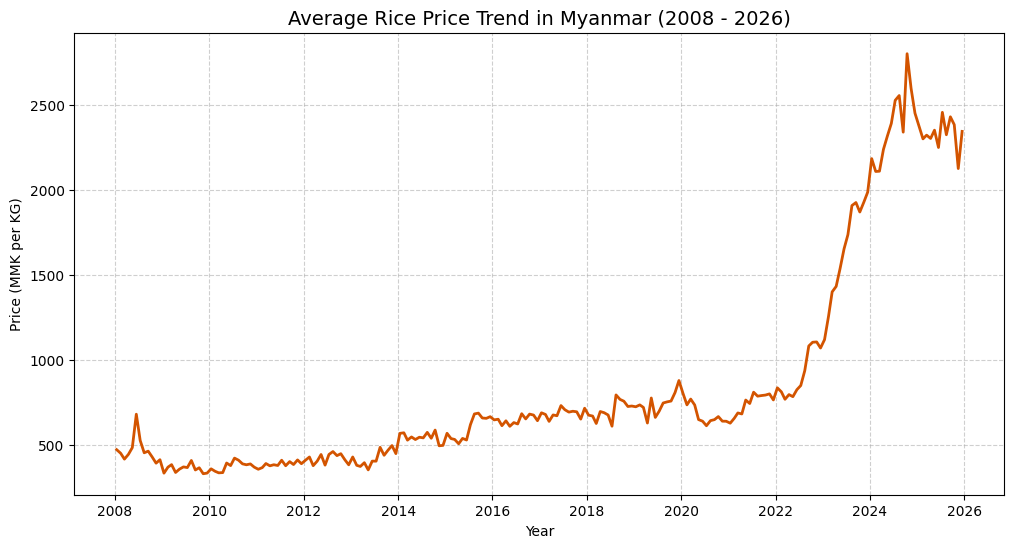

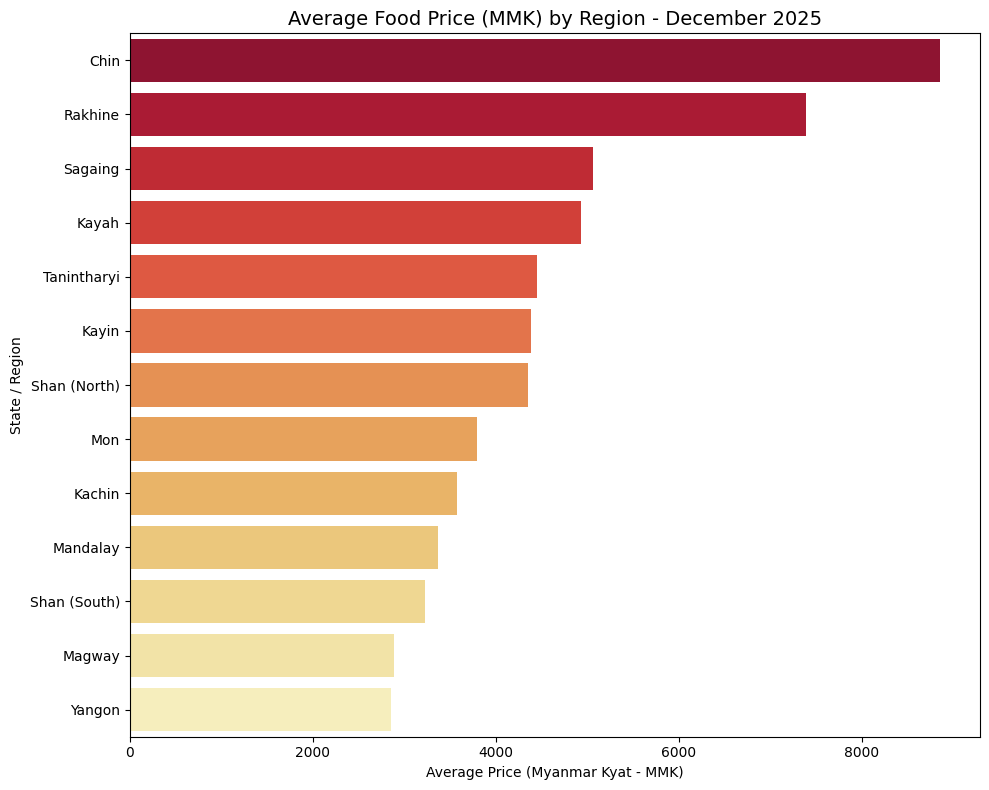

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset (Skipping the 2nd row which contains HXL tags)
file_name = "../data/raw/wfp_food_prices_mmr.csv"
df = pd.read_csv(file_name, skiprows=[1])

# 2. Data Cleaning & Preparation
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Keep only essential columns (Focusing on local 'price' in MMK)
essential_cols = ['date', 'year', 'admin1', 'market', 'category', 'commodity', 'unit', 'price', 'currency']
df_clean = df[essential_cols].copy()

 #Ensure the price column is numeric (removes any non-number errors)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Find the ABSOLUTE most expensive entry (includes non-food like labor wages)
absolute_max = df.loc[df['price'].idxmax()]

# Find the most expensive FOOD item (excludes 'non-food' category)
food_only = df[df['category'] != 'non-food']
food_max = food_only.loc[food_only['price'].idxmax()]

# Get the Top 5 most expensive food items
top_5_food = food_only.sort_values(by='price', ascending=False).head(5)

# --- DISPLAY RESULTS ---

print("--- ABSOLUTE MOST EXPENSIVE ENTRY ---")
print(f"Item: {absolute_max['commodity']}")
print(f"Price: {absolute_max['price']:,} {absolute_max['currency']}")
print(f"Location: {absolute_max['market']}, {absolute_max['admin1']}")
print(f"Date: {absolute_max['date']}")

print("\n--- MOST EXPENSIVE FOOD ITEM ---")
print(f"Item: {food_max['commodity']}")
print(f"Price: {food_max['price']:,} {food_max['currency']} per {food_max['unit']}")
print(f"Location: {food_max['admin1']}")
print(f"Date: {food_max['date']}")

print("\n--- TOP 5 MOST EXPENSIVE FOOD ITEMS ---")
print(top_5_food[['date', 'admin1', 'commodity', 'price', 'unit']])
# 3. ANALYSIS 1: Rice Price Trend (National Average in MMK)
# Filtering for the most common staple
rice_df = df_clean[df_clean['commodity'] == 'Rice (low quality)']
rice_trend = rice_df.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_trend, x='date', y='price', color='#D35400', linewidth=2)
plt.title('Average Rice Price Trend in Myanmar (2008 - 2026)', fontsize=14)
plt.ylabel('Price (MMK per KG)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('rice_price_trend_mmk.png')

# 4. ANALYSIS 2: Regional Price Comparison (Most Recent Data in MMK)
latest_date = df_clean['date'].max()
latest_df = df_clean[df_clean['date'] == latest_date]
regional_avg = latest_df.groupby('admin1')['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(data=regional_avg, x='price', y='admin1', palette='YlOrRd_r')
plt.title(f'Average Food Price (MMK) by Region - {latest_date.strftime("%B %Y")}', fontsize=14)
plt.xlabel('Average Price (Myanmar Kyat - MMK)')
plt.ylabel('State / Region')
plt.tight_layout()
plt.savefig('regional_price_comparison_mmk.png')

# 5. Export Cleaned Data for Power BI or Excel
df_clean.to_csv("../data/cleaned/food_prices_cleaned.csv", index=False)

print("Analysis Complete!")
print("- Chart saved: rice_price_trend_mmk.png")
print("- Chart saved: regional_price_comparison_mmk.png")
print("- Data saved: myanmar_food_prices_cleaned_mmk.csv")


In [11]:
df_clean.describe()

,date,year,price
count,38897,38897.000000,38897.000000
mean,2020-01-23 04:47:10.243977728,2019.555158,2339.158492
min,2008-01-15 00:00:00,2008.000000,3.000000
25%,2016-05-15 00:00:00,2016.000000,700.000000
50%,2021-10-15 00:00:00,2021.000000,1529.990000
75%,2023-09-15 00:00:00,2023.000000,2860.000000
max,2025-12-15 00:00:00,2025.000000,60000.000000
std,NaN,4.780792,2665.279499
